<a href="https://colab.research.google.com/github/G750cloud/20MA573/blob/master/HW3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Consider** an european option with
- call type
- strike = 110
- maturity = T
underlying a Gbm stock with
- initial: 100
- interest rate: 4.75%
- vol ratio: $\sigma$

We denote this bsm price by $f(\sigma, T)$.

- Let $\sigma = 20\%$ fixed. plot $T \mapsto f(0.2, T)$ when $T$ is ranging over $(0.5, 2)$.

- Let $T = 1$ fixed. plot $\sigma \mapsto f(\sigma, 1)$ when $\sigma$ is ranging over $(.05, 0.5)$

- Describe your observations. Do you think the same behavior is also true for put?

- Could you prove your observations?

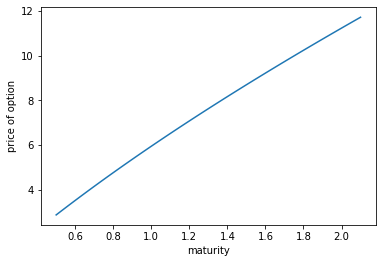

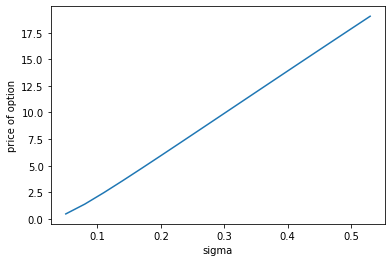

In [0]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
class VanillaOption:
    def __init__(
        self,
        otype = 1, # 1: 'call'
                  # -1: 'put'
        strike = 110.,
        maturity = 1.,
        market_price = 10.):
      self.otype = otype
      self.strike = strike
      self.maturity = maturity
      self.market_price = market_price #this will be used for calibration
    
    def explain_yourself(self):
      if self.otype==1:
        print('I am call')
      elif self.otype==-1:
        print('I am put')

        
    def payoff(self, s): #s: excercise price
      otype = self.otype
      k = self.strike
      maturity = self.maturity
      return max([0, (s - k)*otype])



class Gbm:
    def __init__(self,
                 init_state = 100.,
                 drift_ratio = .0475,
                 vol_ratio = .2
                ):
        self.init_state = init_state
        self.drift_ratio = drift_ratio
        self.vol_ratio = vol_ratio



    def bsm_price(self, vanilla_option):
        s0 = self.init_state
        sigma = self.vol_ratio
        r = self.drift_ratio
        
        otype = vanilla_option.otype
        k = vanilla_option.strike
        maturity = vanilla_option.maturity
        
        d1 = (np.log(s0 / k) + (r + 0.5 * sigma ** 2) 
              * maturity) / (sigma * np.sqrt(maturity))
        d2 = d1 - sigma * np.sqrt(maturity)
        
        return (otype * s0 * ss.norm.cdf(otype * d1) #line break needs parenthesis
                - otype * np.exp(-r * maturity) * k * ss.norm.cdf(otype * d2))

#calculating f when sigma=0.2#
t=np.linspace(0.5, 2.1)
o1=VanillaOption(otype=1, strike=110, maturity=t, market_price=10)
gj1=Gbm()
f1=gj1.bsm_price(o1)
#ploting gragh f when sigma=0.2#
plt.plot(t, f1)
plt.xlabel('maturity')
plt.ylabel('price of option')
plt.show()
#calculating f when t=1#
sigma = np.arange(0.05, 0.53, 0.03)

gj2 = Gbm(100., .0475, sigma)
o2 = VanillaOption(otype=1, strike=110, maturity=1, market_price=10)
f2 = gbm2.bsm_price(o2)
#ploting gragh f when t=1#
plt.plot(sigma, f2)
plt.xlabel('sigma')
plt.ylabel('price of option')
plt.show()

Observation:

1:when sigma is fixed, the price of call option goes up with the increasing maturity. And the value of slope is almost constant.


2:When maturity is fixed, the price of call option goes up with the increasing  value of sigma.And the value of slope is almost constant.